In [4]:
#p value- is probability of null hypothesis being true
#goodness of fit of single categorical variable .if samples represent population
#test of independence between categorical variables
#pearson correlation can be used for numerical variables
#this chi squre can be used to check associatios btw them (categorical variables)
#it is one tailed test
#degree of freedom determines shape of chi square distribution

# Hypothesis Test - III

# Concept Session

## Demo – 1.1: Chi-Square Goodness-Of-Fit Test

A petrol station owner wishes to know whether the petrol sales are distributed uniformly over a year to plan petrol ordering and storage. In this situation, the owner wishes to know whether petrol sale is the same for each month of a year.

He determines the amount of petrol (in liters) sold by sampling one of his petrol pumps each month during a year and obtained the following data. Use a 1% of significance level to test whether the data fit a uniform distribution.

Month: January, February, March, April, May, June, July, August, September, October, November, December

Sold Petrol (in K litre): 261.0,   258.5,    264.9, 259.0, 254.0,239.7,241.0,235.0, 249.5,     256.4,   260.2,     265.5

### Set Null and Alternate Hypothesis

H0: the monthly figures for petrol sales are uniformly distributed.

Ha: the monthly figures for petrol sales are not uniformly distributed.


According to the formula of the chi-square test, it is the sum squares of k independent random multinomial variables and, therefore, it extends in the positive direction of the one-tailed test.


### Determine the appropriate statistical test

ꭕ2 = ∑(fo – fc)**2/fc

We will use the chi-square test and as the expected distribution is a uniform distribution, so degrees of freedom will be,

df = k – 1


### Set the value of alpha (α)

In [1]:
#It is given that a 1% level of significance is to be used to test the hypothesis
alpha=0.01

### Establish the decision rule

i.  If p-value < alpha: Rejection of Null Hypothesis(H0)

ii. If ꭕ2-statistics > ꭕ2-critical : Rejection of Null Hypothesis(H0)

### Analyze the data

#### Collect sample data

In [2]:
observed_data=[261,258.5,264.9,259,254,239.7,241,235,249.5,256.4,260.2,265.5]
n=len(observed_data)

#### Calculate Expected Frequency

In [3]:
expected_frequency=sum(observed_data)/n
print('Expected frequency =',expected_frequency)

Expected frequency = 253.72500000000002


#### Calculate ꭕ2-statistic 

In [4]:
chis=0
for x in observed_data:
    chis=chis+(x-expected_frequency)**2/expected_frequency

print('ꭕ2-statistic =',chis)

ꭕ2-statistic = 4.506227214503889


#### Calculate ꭕ2-critical 

In [5]:
from scipy.stats import chi2

chi_critical = chi2.ppf(1-alpha, df=11)
print("ꭕ2-critical =",chi_critical)

ꭕ2-critical = 24.724970311318277


#### Calculate p-value

In [7]:
from scipy.stats import norm

p_value = norm.sf(abs(chis),11) #One tailed test
print("The p_value is "+str(p_value))

The p_value is 0.9999999999581435


#### Plot chi-square distribution

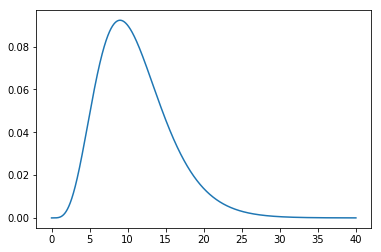

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

x=np.arange(0,40,0.01)

plt.plot(x, chi2.pdf(x,df=11))

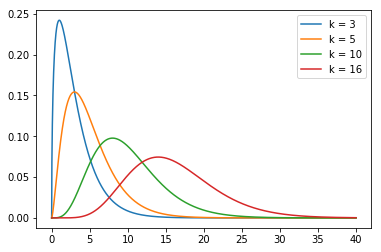

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

x=np.arange(0,40,0.01)

plt.plot(x, chi2.pdf(x,df=3), x, chi2.pdf(x,df=5), x, chi2.pdf(x,df=10), x, chi2.pdf(x,df=16))
plt.legend(['k = 3','k = 5','k = 10', 'k = 16'])

### Reach a statistical conclusion

As per the decision rule: 
    
i.  If p-value < alpha: Rejection of Null Hypothesis(H0)

ii. If ꭕ2-statistic > ꭕ2-critical : Rejection of Null Hypothesis(H0)

From our study,

p-value = 0.09 > alpha = 0.01, which leads to acceptance of Null Hypothesis.

ꭕ2-statistic = 4.506 < ꭕ2-critical = 24.725, which leads to acceptance of Null Hypothesis.


### Make the business decision

The ꭕ2-statistic value of 4.506 is lesser than the ꭕ2-critical value of 24.725, so the decision is to accept the null hypothesis. 

This solution provides enough evidence  to indicate the distribution of sales of petrol is a uniform distribution.

## Demo - 1.2: Chi-Square of Independence Test

A soft drink maker industry asked Cora, a marketing analyst, to determine whether customers’ ages and their favorite beverages are independent of each other.

She took a random pole of 310 customers to perform the analysis. The observed values are taken in the following contingency table.
![](beverages.png)


Use a 1% significance level and help Cora to determine whether the age and preferred beverage variables are independent. 

### Set Null and Alternate Hypothesis

H0: the type of beverage preferred is independent of age.

Ha: the type of beverage preferred is not independent of age.


This test is a one-tailed test.

### Determine the appropriate statistical test

ꭕ2 = ∑ ∑(fo – fc)**2/fc

We will use the chi-square test of independence and as the values are summed across rows and columns, so degrees of freedom will be,

df = (r – 1)*(c - 1) 

Where r = the number of rows and c = number of columns 

### Set the value of alpha (α)

In [2]:
#It is given that a 1% level of significance is to be used to test the hypothesis.

alpha=0.01

### Establish the decision rule

i. If ꭕ2-statistics > ꭕ2-critical : Rejection of Null Hypothesis(H0)

### Set degrees of freedom

Degrees of Freedom (df) = (3 – 1)*(3 – 1) = 4

In [1]:
df=4

### Analyze the data

In [3]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table
table = [[26,95,18],
[41,40,20],[24,14,32]]
print(table)

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
print(p,stat)

[[26, 95, 18], [41, 40, 20], [24, 14, 32]]
dof=4
[[40.80322581 66.80967742 31.38709677]
 [29.6483871  48.54516129 22.80645161]
 [20.5483871  33.64516129 15.80645161]]
8.35853869537687e-12 57.81157918980688


### Calculate ꭕ2-critical value:

In [15]:
# interpret test-statistic

critical = chi2.ppf(1-alpha, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (alpha, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

# interpret p-value
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.010, critical=13.277, stat=57.812
Dependent (reject H0)
significance=0.010, p=0.000
Dependent (reject H0)


### Plot the chi-square distribution

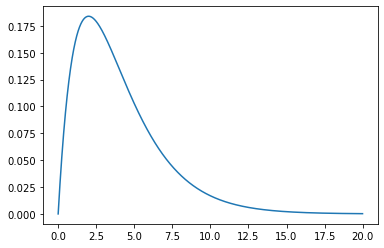

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

x=np.arange(0,20,0.01)

plt.plot(x, chi2.pdf(x,df=4))


### Reach a statistical conclusion

As per the decision rule: 
    
i.  If p-value < alpha: Rejection of Null Hypothesis(H0)

ii. If ꭕ2-statistic > ꭕ2-critical: Rejection of Null Hypothesis(H0)

From our study,

p-value = 0.000 < alpha = 0.01, which leads to rejection of the Null Hypothesis.

ꭕ2-statistic = 57.00 > ꭕ2-critical = 13.28, which leads to rejection of the Null Hypothesis.

### Make the business decision

The ꭕ2-statistic value of 57.81 is greater than the ꭕ2-critical value of 13.28, so the decision is to reject the null hypothesis. 

The two variables, preferred beverage, and age are not independent. 
